## EDA for GoodReads Dataset


In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
import os
dataset_path = '../datasets/goodreads'
books_pd = pd.DataFrame(columns = pd.read_csv(os.path.join(dataset_path,'book1000k-1100k.csv')).columns)
print(books_pd)
users_pd = pd.DataFrame(columns = pd.read_csv(os.path.join(dataset_path,'user_rating_0_to_1000.csv')).columns)
print(users_pd)

Empty DataFrame
Columns: [Id, Name, Authors, ISBN, Rating, PublishYear, PublishMonth, PublishDay, Publisher, RatingDist5, RatingDist4, RatingDist3, RatingDist2, RatingDist1, RatingDistTotal, CountsOfReview, Language, pagesNumber, Description, Count of text reviews]
Index: []
Empty DataFrame
Columns: [ID, Name, Rating]
Index: []


In [3]:
import fnmatch
for dirname, _, filenames in os.walk('../datasets/goodreads'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        if fnmatch.fnmatch(filename, 'book*.csv'):
            books_pd = pd.concat([books_pd, pd.read_csv(os.path.join(dataset_path,filename))])
        if fnmatch.fnmatch(filename, 'user*.csv'):
            users_pd = pd.concat([users_pd, pd.read_csv(os.path.join(dataset_path,filename))])
books_pd.info(show_counts=True)

../datasets/goodreads/book600k-700k.csv
../datasets/goodreads/book1600k-1700k.csv
../datasets/goodreads/book200k-300k.csv
../datasets/goodreads/user_rating_0_to_1000.csv
../datasets/goodreads/book100k-200k.csv
../datasets/goodreads/book500k-600k.csv
../datasets/goodreads/book1-100k.csv
../datasets/goodreads/book1300k-1400k.csv
../datasets/goodreads/book800k-900k.csv
../datasets/goodreads/user_rating_6000_to_11000.csv
../datasets/goodreads/book1700k-1800k.csv
../datasets/goodreads/user_rating_4000_to_5000.csv
../datasets/goodreads/book1400k-1500k.csv
../datasets/goodreads/book1000k-1100k.csv
../datasets/goodreads/book2000k-3000k.csv
../datasets/goodreads/book400k-500k.csv
../datasets/goodreads/archive.zip
../datasets/goodreads/book900k-1000k.csv
../datasets/goodreads/user_rating_3000_to_4000.csv
../datasets/goodreads/book4000k-5000k.csv
../datasets/goodreads/book1100k-1200k.csv
../datasets/goodreads/user_rating_5000_to_6000.csv
../datasets/goodreads/book1800k-1900k.csv
../datasets/goodr

In [4]:
users_pd.info()
books_pd.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362596 entries, 0 to 30632
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      362596 non-null  object
 1   Name    362596 non-null  object
 2   Rating  362596 non-null  object
dtypes: object(3)
memory usage: 11.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850310 entries, 0 to 54272
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Id                     1850310 non-null  object 
 1   Name                   1850310 non-null  object 
 2   Authors                1850310 non-null  object 
 3   ISBN                   1844387 non-null  object 
 4   Rating                 1850310 non-null  float64
 5   PublishYear            1850310 non-null  object 
 6   PublishMonth           1850310 non-null  object 
 7   PublishDay             1850310 non-null  object 
 8   Publisher

In [5]:
users_pd.head(20)

,ID,Name,Rating
0,1,Agile Web Development with Rails: A Pragmatic ...,it was amazing
1,1,The Restaurant at the End of the Universe (Hit...,it was amazing
2,1,Siddhartha,it was amazing
3,1,The Clock of the Long Now: Time and Responsibi...,really liked it
4,1,"Ready Player One (Ready Player One, #1)",really liked it
5,1,"The Hunger Games (The Hunger Games, #1)",it was amazing
6,1,"The Clue in the Embers (Hardy Boys, #35)",it was amazing
7,1,The Authoritative Calvin and Hobbes: A Calvin ...,it was amazing
8,1,"The Clue of the Broken Blade (Hardy Boys, #21)",it was amazing
9,1,"The Clue of the Hissing Serpent (Hardy Boys, #53)",it was amazing


## Check the books with duplicated names

In [6]:

books_pd['Name'].nunique()

1636235

In [7]:
books_pd[books_pd['Name'].duplicated(keep = False)].sort_values('Name')

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
187321,3529667,"""A Trade Like Any Other"": Female Singers and D...",Karin van Nieuwkerk,0292787200,4.33,1995,1,1,University of Texas Press,5:26,...,3:9,2:0,1:0,total:52,0,NaN,NaN,"In Egypt, singing and dancing are considered e...",NaN,226.0
33743,560791,"""A Trade Like Any Other"": Female Singers and D...",Karin van Nieuwkerk,0292787235,4.33,1995,1,1,University of Texas Press,5:26,...,3:9,2:0,1:0,total:51,6,NaN,240,NaN,NaN,NaN
202956,3573192,"""Ace"" Any Test",Ron Fry,1564140792,2.95,1994,8,1,Career Press,5:0,...,3:7,2:5,1:1,total:19,0,NaN,NaN,"Testy on test day? Don't stress! ""ACE"" ANY TES...",NaN,128.0
145488,2340088,"""Ace"" Any Test",Ron Fry,1564144607,2.89,2000,7,1,Career Press,5:0,...,3:7,2:5,1:1,total:18,0,NaN,NaN,"Shows how to conquer test anxiety, manage time...",NaN,124.0
35550,362418,"""After Mecca"": Women Poets and the Black Arts ...",Cheryl Clark,0813534062,4.19,2004,24,11,Rutgers University Press,5:7,...,3:4,2:0,1:0,total:16,3,NaN,224,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4256,1210051,鹿鼎記（一）,Jin Yong,9573258064,4.29,2006,16,7,遠流出版事業股份有限公司,5:459,...,3:117,2:21,1:12,total:923,0,zho,472,奇書者，《鹿鼎記》是也。《鹿鼎記》奇在哪裡？奇在金庸的其他小說都有明顯的悲劇角色和故事，唯獨...,0,NaN
269,1500766,"�buen Viaje! Level 2, Student Edition",Protase E. Woodford,007861970X,3.60,2004,3,3,McGraw-Hill Education,5:0,...,3:2,2:0,1:0,total:5,0,NaN,493,�Buen viaje! is a comprehensive three-level pr...,0,NaN
10970,1734000,"�buen Viaje! Level 2, Student Edition",Protase E. Woodford,0078256828,3.00,2001,13,3,McGraw-Hill Education,5:0,...,3:1,2:0,1:0,total:1,0,NaN,536,Students continue building skills for proficie...,NaN,NaN
161298,4489958,"�umar Ibn Al-Farid: Sufi Verse, Saintly Life",'Umar Ibn 'Ali Ibn Al-Farid,0809105284,3.95,2001,5,1,Paulist Press,5:9,...,3:5,2:1,1:1,total:22,0,NaN,NaN,Umar Ibn al-Farid (b. 576 [hijri date]/1181 CE...,NaN,384.0


## Check the fully duplicated books

In [8]:

books_pd[books_pd.duplicated(keep = False)].sort_values('Name')

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
44129,76793,101 Essential Tips: Planning A Small Yard,John Brookes,NaN,3.20,1996,23,5,NaN,5:0,...,3:2,2:1,1:0,total:5,2,NaN,72,NaN,NaN,NaN
44242,76793,101 Essential Tips: Planning A Small Yard,John Brookes,NaN,3.20,1996,23,5,NaN,5:0,...,3:2,2:1,1:0,total:5,2,NaN,72,NaN,NaN,NaN
44123,76785,A Carra King (Inspector Matt Minogue #6),John Brady,1586420186,3.45,2015,15,10,NaN,5:6,...,3:13,2:4,1:3,total:44,6,eng,548,NaN,NaN,NaN
44235,76785,A Carra King (Inspector Matt Minogue #6),John Brady,1586420186,3.45,2015,15,10,NaN,5:6,...,3:13,2:4,1:3,total:44,6,eng,548,NaN,NaN,NaN
49815,85994,A New World Order,Anne-Marie Slaughter,0691123977,3.42,2005,7,8,Princeton University Press,5:19,...,3:23,2:14,1:6,total:86,7,NaN,368,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44140,76809,Wishful Thinking: A Theological ABC,Frederick Buechner,0060611391,4.29,1993,24,9,HarperOne,5:497,...,3:144,2:25,1:3,total:1028,63,NaN,144,NaN,NaN,NaN
49773,85931,Writings on Psychoanalysis: Freud and Lacan,Louis Althusser,0231101694,3.71,1999,3,3,Columbia University Press,5:16,...,3:21,2:4,1:2,total:66,0,NaN,208,NaN,NaN,NaN
49856,85931,Writings on Psychoanalysis: Freud and Lacan,Louis Althusser,0231101694,3.71,1999,3,3,Columbia University Press,5:16,...,3:21,2:4,1:2,total:66,0,NaN,208,NaN,NaN,NaN
44145,76814,"Young Miles (Vorkosigan Omnibus, #2)",Lois McMaster Bujold,0671877828,4.39,1997,1,6,Baen,5:3027,...,3:624,2:65,1:14,total:5784,13,eng,592,NaN,NaN,NaN


## Drop the duplicated books

In [9]:
books_pd.drop_duplicates(inplace = True)
books_pd.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1850198 entries, 0 to 54272
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Id                     1850198 non-null  object 
 1   Name                   1850198 non-null  object 
 2   Authors                1850198 non-null  object 
 3   ISBN                   1844276 non-null  object 
 4   Rating                 1850198 non-null  float64
 5   PublishYear            1850198 non-null  object 
 6   PublishMonth           1850198 non-null  object 
 7   PublishDay             1850198 non-null  object 
 8   Publisher              1832375 non-null  object 
 9   RatingDist5            1850198 non-null  object 
 10  RatingDist4            1850198 non-null  object 
 11  RatingDist3            1850198 non-null  object 
 12  RatingDist2            1850198 non-null  object 
 13  RatingDist1            1850198 non-null  object 
 14  RatingDistTotal     

In [10]:
books_pd.head()

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
0,600000,"Lessons Learned (Great Chefs, #2)",Nora Roberts,037351025X,3.74,1993,15,2,Silhouette,5:947,...,3:1061,2:287,1:63,total:3374,86,eng,250,LESSONS LEARNED...<br /><br />Coordinating the...,NaN,NaN
1,600001,Walking by Faith: Lessons Learned in the Dark,Jennifer Rothschild,0633099325,4.27,2003,1,1,Lifeway Church Resources,5:367,...,3:109,2:22,1:5,total:749,7,NaN,112,"At the age of fifteen, Jennifer Rothschild con...",NaN,NaN
2,600003,Better Health in Africa: Experience and Lesson...,World Bank Group,0821328174,5.00,1994,1,1,World Bank Publications,5:1,...,3:0,2:0,1:0,total:1,1,NaN,240,NaN,NaN,NaN
3,600004,"The Blended Learning Book: Best Practices, Pro...",Josh Bersin,0787972967,4.10,2004,1,10,Pfeiffer,5:8,...,3:6,2:0,1:0,total:20,3,NaN,319,<i>The Blended Learning Book</i> is your user'...,NaN,NaN
4,600005,Lessons Learned: Successes Achieved: Be Prepar...,Robert G. Gillio,0595417566,3.00,2006,30,11,iUniverse,5:0,...,3:1,2:0,1:0,total:1,0,NaN,168,"""<b>Lessons Learned: Successes Achieved</b>"" w...",NaN,NaN


## See the popular names of books

/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of books')

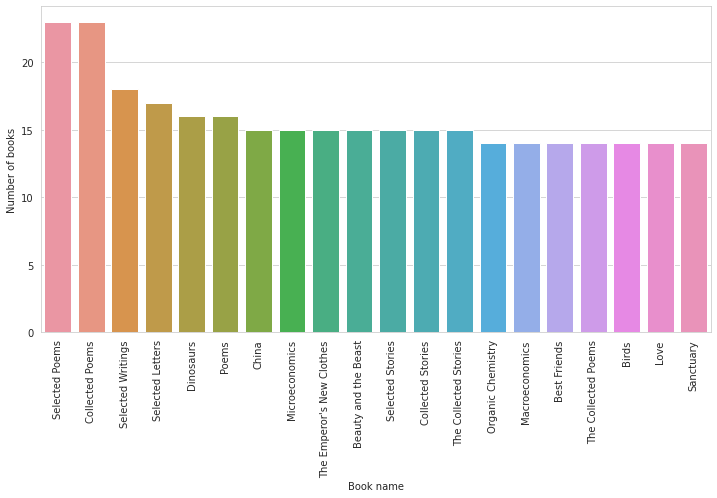

In [11]:
plt.figure(figsize = (12,6))
popular_names = sns.barplot(books_pd[~books_pd[['Name', 'Authors']].duplicated()]['Name'].value_counts().head(20).index, books_pd[~books_pd[['Name', 'Authors']].duplicated()]['Name'].value_counts().head(20).values)
popular_names.set_xticklabels(popular_names.get_xticklabels(), rotation=90)
popular_names.set_xlabel('Book name')
popular_names.set_ylabel('Number of books')

## Which books have the most published editions
### "Jane Eyre" and "The Scarlet Letter" have 20 different published editions

In [12]:
books_pd[books_pd[['Name', 'Authors']].duplicated()]['Name'].value_counts().head(20)

Jane Eyre               20
The Scarlet Letter      20
The Prince              19
Madame Bovary           19
Hamlet                  19
Mansfield Park          19
Northanger Abbey        18
Little Women            18
Frankenstein            18
The Age of Innocence    18
The Art of War          18
Robinson Crusoe         17
The Secret Garden       17
Bleak House             17
Middlemarch             17
Othello                 17
A Christmas Carol       17
Treasure Island         17
Great Expectations      17
Wuthering Heights       17
Name: Name, dtype: int64

# Authors
## It appears that "Anonymous" is the most fruitable writer. However, the real person who writes the most books is Shakespeare

In [13]:
books_pd['Authors'].nunique()

675289

In [14]:
name_authors=books_pd[['Name', 'Authors']].drop_duplicates()
books_cnt = name_authors.groupby('Authors').size().sort_values(ascending=False)
books_cnt.head(20)

Authors
Anonymous                             2655
Unknown                               1987
National Research Council              881
Cram101 Textbook Reviews               876
Fodor's Travel Publications Inc.       846
William Shakespeare                    784
Francine Pascal                        769
Various                                732
Harold Bloom                           708
Hal Leonard Publishing Company         584
Isaac Asimov                           577
Walt Disney Company                    574
Carolyn Keene                          569
NOT A BOOK                             551
R.L. Stine                             527
Agatha Christie                        526
Enid Blyton                            463
Time-Life Books                        444
Ann M. Martin                          421
Alfred A. Knopf Publishing Company     407
dtype: int64

In [15]:
print(name_authors[name_authors['Authors']=='William Shakespeare'])

                                                    Name              Authors
729                                     Macbeth / Hamlet  William Shakespeare
730    Romeo y Julieta/Macbeth/Hamlet/Otelo/La fierec...  William Shakespeare
735                                    Macbeth / Macbeth  William Shakespeare
736    Macbeth. El Mercader de Venecia. Las Alegres C...  William Shakespeare
739                                               Hamlet  William Shakespeare
...                                                  ...                  ...
40359  Comedies, Histories, and Tragedies 1664 Editio...  William Shakespeare
40360  Comedies, Histories, and Tragedies 1623 Editio...  William Shakespeare
40361  Comedies, Histories, and Tragedies 1685 Editio...  William Shakespeare
40362  Comedies, Histories, and Tragedies 1632 Editio...  William Shakespeare
47250      To Be or Not To Be: Shakespeare's Soliloquies  William Shakespeare

[784 rows x 2 columns]


## ISBN

In [16]:
books_pd[books_pd['ISBN'].isnull()]

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
219,600399,"The Search for the Silver Persian (Nancy Drew,...",Carolyn Keene,NaN,3.76,1993,1,8,Aladdin Paperbacks,5:59,...,3:73,2:18,1:1,total:221,4,NaN,160,NaN,NaN,NaN
220,600400,The Case of the Safecracker's Secret (Nancy Dr...,Carolyn Keene,NaN,3.80,1990,1,2,Aladdin Paperbacks,5:61,...,3:75,2:11,1:3,total:223,4,NaN,154,Someone has broken into the safety depository ...,NaN,NaN
932,601648,Les Magiciennes,Boileau-Narcejac,NaN,3.24,1957,1,8,Editions Denoel,5:3,...,3:21,2:8,1:1,total:49,0,fre,184,"Quand meurt le professeur Alberto, un prestigi...",NaN,NaN
1067,601870,"Dangerous To Trust (Spies, Lies & Lovers, #1)",Sally Tyler Hayes,NaN,3.91,2017,21,3,Teresa Hill,5:106,...,3:75,2:20,1:5,total:282,29,NaN,255,NaN,NaN,NaN
1998,603392,A Season Beyond a Kiss,Kathleen E. Woodiwiss,NaN,3.86,2000,29,2,William Morrow Paperbacks,5:815,...,3:594,2:186,1:63,total:2422,47,eng,500,<i>Librarian's note: Alternate cover edition o...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51165,794444,"Annihilation (Transformers, #2)",David Cian,NaN,3.27,2003,28,10,iBooks,5:7,...,3:14,2:10,1:1,total:41,2,NaN,320,The world is at war-and the Transformers are a...,2,NaN
51224,794561,"The Loves of Charles II (Stuart Saga, #2-4)",Jean Plaidy,NaN,3.92,2005,25,10,Crown Publishing Group,5:155,...,3:132,2:25,1:4,total:499,17,NaN,608,<b>From princesses to country girls to actress...,17,NaN
51706,795474,The Moche Warrior (Lara McClintoch Archeologic...,Lyn Hamilton,NaN,3.60,2013,12,6,Bev Editions,5:76,...,3:166,2:32,1:8,total:448,28,eng,336,NaN,28,NaN
52089,796214,The Robber Barons,Matthew Josephson,NaN,3.82,1962,24,1,Mariner Books,5:67,...,3:56,2:19,1:6,total:245,23,eng,496,"John D. Rockefeller, J. P. Morgan, Cornelius V...",23,NaN


## Ratings

In [17]:
books_pd['Rating'].describe()

count    1.850198e+06
mean     2.894194e+00
std      1.725043e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.680000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

(array([4.51777e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.31800e+03,
        1.20000e+02, 1.23000e+03, 1.86000e+02, 2.05920e+04, 4.26800e+03,
        1.85010e+04, 1.45610e+04, 1.22608e+05, 1.07795e+05, 2.33221e+05,
        2.57864e+05, 3.38714e+05, 1.17243e+05, 6.58870e+04, 8.93130e+04]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

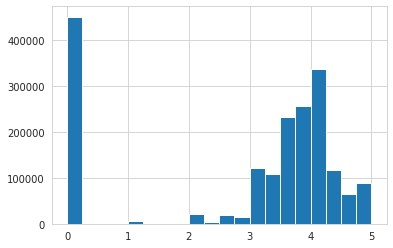

In [18]:
plt.hist(books_pd['Rating'], bins=20)

In [19]:
books_pd[books_pd['Rating']==0]

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
5,600006,Charting Your Course: Lessons Learned During t...,John G. Conyers,0873896076,0.0,2003,9,12,ASQ Quality Press,5:0,...,3:0,2:0,1:0,total:0,0,NaN,174,NaN,NaN,NaN
11,600013,Small Specimen Test Techniques (ASTM Special T...,Nev.) Symposium on Small Specimen Test Techniq...,0803128975,0.0,2002,28,8,ASTM,5:0,...,3:0,2:0,1:0,total:0,0,NaN,494,NaN,NaN,NaN
12,600014,Genre and Void: Looking Back at Sartre and Bea...,Max Deutscher,0754632962,0.0,2003,20,8,Ashgate Publishing,5:0,...,3:0,2:0,1:0,total:0,0,NaN,268,Developing a reading of some of Beauvoir and S...,NaN,NaN
13,600016,Laser Diode Technology and Applications III,Daniel Renner,0819405086,0.0,1991,1,6,SPIE-International Society for Optical Enginee...,5:0,...,3:0,2:0,1:0,total:0,0,NaN,499,NaN,NaN,NaN
14,600018,Calendar of Inquisitions Post-Mortem and Other...,J.L. Kirby,0851158994,0.0,2002,8,12,Boydell Press,5:0,...,3:0,2:0,1:0,total:0,0,NaN,480,This volume of the Calendar of Inquisitions Po...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54241,799936,Integral Yoga Psychology,V. Madhusudan Reddy,0941524922,0.0,1990,1,2,Lotus Press (WI),5:0,...,3:0,2:0,1:0,total:0,0,NaN,170,"This very important work, written by V. Madhus...",0,NaN
54242,799937,Yoga Psychology: The Science of the Inward Con...,Robert C. Leslie,0595393683,0.0,2006,24,4,iUniverse,5:0,...,3:0,2:0,1:0,total:0,0,NaN,152,You are not who you think you are! Here you ca...,0,NaN
54260,799980,Great Fugues for Solo Keyboard,David Dutkanicz,0486457273,0.0,2007,15,3,Dover Publications,5:0,...,3:0,2:0,1:0,total:0,0,NaN,112,Familiar from its use as a method of teaching ...,0,NaN
54267,799990,Favorite Opera Highlights for Solo Piano,Albert H. Stanley,0486446336,0.0,2005,26,8,Dover Publications,5:0,...,3:0,2:0,1:0,total:0,0,NaN,128,The difficulty in choosing great music from op...,0,NaN


## Published year month and day

In [20]:
books_pd['PublishYear'] = books_pd['PublishYear'].astype('int')
books_pd['PublishMonth'] = books_pd['PublishMonth'].astype('int')
books_pd['PublishDay'] = books_pd['PublishDay'].astype('int')

(array([1.850189e+06, 0.000000e+00, 0.000000e+00, 6.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 3.000000e+00]),
 array([1.00000e+00, 6.55440e+03, 1.31078e+04, 1.96612e+04, 2.62146e+04,
        3.27680e+04, 3.93214e+04, 4.58748e+04, 5.24282e+04, 5.89816e+04,
        6.55350e+04]),
 <BarContainer object of 10 artists>)

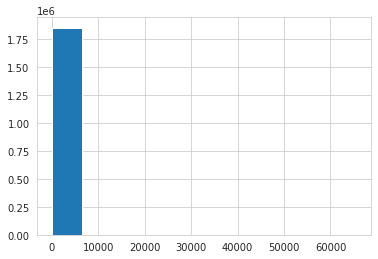

In [21]:
plt.hist(books_pd['PublishYear'])

<AxesSubplot:xlabel='PublishYear'>

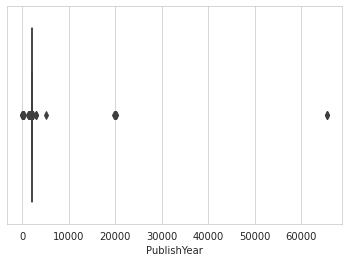

In [22]:
sns.boxplot(x=books_pd['PublishYear'])

In [23]:
books_pd[books_pd['PublishYear']>2021]

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
32271,657982,"Ultimate X-Men, Volume 5: Ultimate War",Mark Millar,1904159443,3.79,20040,31,8,Panini UK,5:715,...,3:696,2:176,1:53,total:2366,2,eng,112,The Ultimates vs. the Ultimate X-Men: the batt...,NaN,NaN
31274,1694730,Global Politics: A New Introduction,Jenny Edkins,0415431301,3.62,20099,1,1,Routledge,5:15,...,3:21,2:3,1:4,total:64,0,NaN,568,Global Politics: A New Introduction is an inno...,0,NaN
45624,582684,The graphic work of M.C. Escher,M.C. Escher,NaN,3.91,4989,1,1,Taco,5:26498,...,3:10937,2:4388,1:4197,total:62435,0,eng,16,NaN,NaN,NaN
25597,42574,The Water Babies: A Fairy Tale for a Land Baby,Charles Kingsley,0543956121,3.42,3002,21,8,Adamant Media Corporation,5:1711,...,3:2379,2:1132,1:494,total:7645,0,NaN,372,NaN,NaN,NaN
23871,1359960,Guidance For Women In Twelfth Century Convents,Jocelyn Wogan-Browne,0859918254,4.00,2100,6,11,Brewer,5:0,...,3:0,2:0,1:0,total:2,0,NaN,203,A significant and lasting contribution to the ...,0,NaN
14830,1746177,"La femme de guerre (Les colonnes du ciel, #3)",Bernard Clavel,2266136682,3.31,65535,20,11,Pocket,5:2,...,3:7,2:2,1:0,total:13,0,fre,270,"En cette année 1639, quel contraste entre la F...",NaN,NaN
5049,1012420,Jared Grace's How-to-Draw Book,Benjamin Harper,1416949526,0.00,2030,31,12,Simon Scribbles,5:0,...,3:0,2:0,1:0,total:0,0,NaN,48,The <em>Spiderwick Stained Glass Book</em> fea...,0,NaN
46191,2102912,Le Sang noir,Louis Guilloux,2070230570,3.99,2035,10,11,Gallimard,5:56,...,3:26,2:13,1:2,total:159,0,NaN,NaN,"""Il luogo dove si svolge la vicenda di SANGUE ...",NaN,515.0
122581,2283161,La Normandie Avant Les Normands: De La Conquê...,Elisabeth Deniaux,2737311179,0.00,2202,9,16,Ouest-France,5:0,...,3:0,2:0,1:0,total:0,0,fre,NaN,NaN,NaN,448.0
130018,2301252,China (National Geographic Countries of the Wo...,Jen Green,0792275756,3.44,2030,12,31,National Geographic Children's Books,5:3,...,3:4,2:2,1:0,total:9,0,NaN,NaN,National Geographic invites you to journey thr...,NaN,64.0


In [24]:
books_pd[books_pd['PublishYear']<1900]

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
37378,667209,The Comic History of Rome,Gilbert Abbott à Beckett,0865163332,2.92,1852,1,1,Bolchazy-Carducci Publishers,5:2,...,3:2,2:1,1:4,total:13,0,eng,308,"Beckett's The Comic History of Rome, first pub...",NaN,NaN
52800,695821,The Neandertals: Changing the Image of Mankind,Erik Trinkaus,1597402206,3.86,1899,31,12,ACLS History E-Book Project,5:10,...,3:16,2:1,1:0,total:59,0,NaN,484,"In 1856, at the very time when Charles Darwin ...",NaN,NaN
6751,1620672,Poetical Works of Thomas Hood,Thomas Hood,NaN,4.00,1895,1,1,Reprint Services Corp,5:6,...,3:3,2:0,1:1,total:17,0,eng,615,To Hope; The Departure of Summer;The Sea of De...,0,NaN
20849,1663365,The Carolingian Renaissance and the Idea of Ki...,Walter Ullmann,1597401455,3.67,1899,31,12,ACLS History E-Book Project,5:0,...,3:1,2:0,1:0,total:3,0,NaN,220,NaN,0,NaN
29019,1687745,Voices in Time,Hugh MacLennan,0773524959,3.46,1899,30,12,McGill-Queen's University Press,5:13,...,3:22,2:12,1:4,total:83,0,NaN,316,Juxtaposes the insanity of life in Nazi German...,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33498,1977322,My Bible Study Notebook,Jerold Potter,1557482802,0.00,1899,12,30,Barbour Books,5:0,...,3:0,2:0,1:0,total:0,0,NaN,NaN,Organize and preserve thoughts from church ser...,NaN,112.0
1155,702191,"The City of the Saints, and Across the Rocky M...",Richard Francis Burton,1418133566,4.07,1899,1,1,University of Michigan Library,5:16,...,3:8,2:1,1:1,total:46,0,NaN,600,The British explorer Sir Richard F. Burton (18...,0,NaN
3940,707301,Birth Control in America: The Career of Margar...,David M. Kennedy,1597401781,3.26,1899,31,12,ACLS History E-Book Project,5:2,...,3:10,2:0,1:2,total:19,0,NaN,340,Combines biography of M. Sanger with social hi...,0,NaN
17276,731727,El futuro del espaciotiempo,Stephen Hawking,8484323994,3.94,200,28,2,Crítica,5:116,...,3:85,2:22,1:3,total:348,1,spa,296,"Desde Einstein, y sobre todo a partir de su te...",1,NaN


In [25]:
books_pd[['PublishYear', 'PublishMonth', 'PublishDay']].describe()

,PublishYear,PublishMonth,PublishDay
count,1.850198e+06,1.850198e+06,1.850198e+06
mean,1.997842e+03,7.700395e+00,7.987328e+00
std,8.789724e+01,7.756715e+00,8.431971e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.993000e+03,1.000000e+00,1.000000e+00
50%,2.000000e+03,6.000000e+00,5.000000e+00
75%,2.005000e+03,1.100000e+01,1.100000e+01
max,6.553500e+04,3.100000e+01,3.100000e+01


## Drop the books with published year > 2021 and < 1900

In [26]:
books_pd.drop((books_pd[(books_pd['PublishYear'] < 1900) | (books_pd['PublishYear'] > 2021)].index).tolist(), inplace = True)


## It appears that the month and day for some books are switched. Need to fix this

In [27]:
books_pd.reset_index(drop=True, inplace=True)

In [28]:
err_index = books_pd.index[books_pd['PublishMonth']>12]

In [29]:
PublishMonth = books_pd.loc[err_index,'PublishMonth']
books_pd.loc[err_index, 'PublishMonth']=books_pd.loc[err_index,'PublishDay']
books_pd.loc[err_index,'PublishDay'] = PublishMonth

In [30]:
books_pd.loc[err_index]
books_pd['PublishMonth'].unique()

array([ 2,  1, 11,  9,  7, 10,  8,  3,  4,  6,  5, 12])

In [31]:
books_pd['PublishDay'].unique()

array([15,  1, 10, 30, 12, 25, 24, 28, 20,  6, 21,  9,  2, 17,  5,  8,  7,
       22, 19, 26, 14, 29,  4, 11,  3, 31, 16, 27, 13, 18, 23])

<AxesSubplot:xlabel='PublishYear', ylabel='Count'>

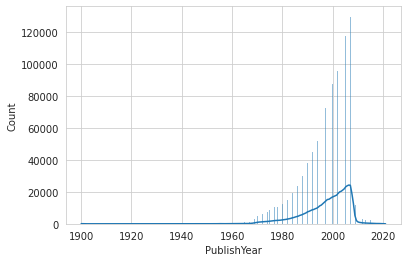

In [32]:
sns.histplot(books_pd, x='PublishYear', kde=True)


<AxesSubplot:xlabel='PublishMonth', ylabel='Count'>

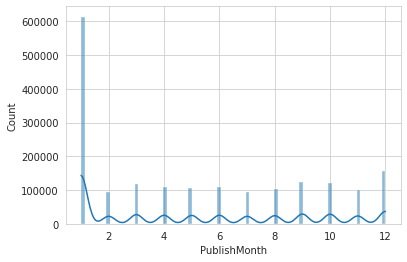

In [33]:
sns.histplot(books_pd, x='PublishMonth', kde=True)

<AxesSubplot:xlabel='PublishDay', ylabel='Count'>

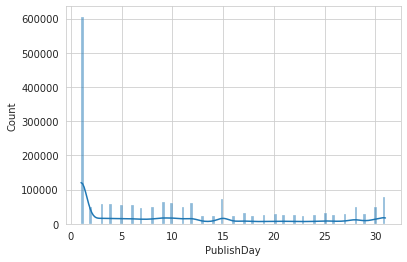

In [34]:
sns.histplot(books_pd, x='PublishDay', kde=True)

# Publisher

In [35]:
books_pd['Publisher'].isnull().value_counts()

False    1830046
True       17793
Name: Publisher, dtype: int64

## Drop the data with no publisher info

In [36]:
books_pd.drop((books_pd[books_pd['Publisher'].isnull()].index).tolist(), inplace=True)
books_pd.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830046 entries, 0 to 1847838
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Id                     1830046 non-null  object 
 1   Name                   1830046 non-null  object 
 2   Authors                1830046 non-null  object 
 3   ISBN                   1824329 non-null  object 
 4   Rating                 1830046 non-null  float64
 5   PublishYear            1830046 non-null  int64  
 6   PublishMonth           1830046 non-null  int64  
 7   PublishDay             1830046 non-null  int64  
 8   Publisher              1830046 non-null  object 
 9   RatingDist5            1830046 non-null  object 
 10  RatingDist4            1830046 non-null  object 
 11  RatingDist3            1830046 non-null  object 
 12  RatingDist2            1830046 non-null  object 
 13  RatingDist1            1830046 non-null  object 
 14  RatingDistTotal   

In [37]:
# Which publisher issued the biggest variety of books?
books_pd['Publisher'].value_counts().head(10)

Routledge                                                     37611
Springer                                                      35775
Oxford University Press, USA                                  26960
Cambridge University Press                                    25934
Wiley                                                         12124
CRC Press                                                     11808
Peter Lang Gmbh, Internationaler Verlag Der Wissenschaften    11435
Prentice Hall                                                 11052
iUniverse                                                      9914
John Wiley & Sons                                              8493
Name: Publisher, dtype: int64

# The Rating distribution data has the rating number after a colon. Need to fix this

In [38]:
books_pd['RatingDistTotal'] = books_pd['RatingDistTotal'].apply(lambda rating: rating.split(':')[1]).astype('int')
books_pd['RatingDist1'] = books_pd['RatingDist1'].apply(lambda rating: rating.split(':')[1]).astype('int')
books_pd['RatingDist2'] = books_pd['RatingDist2'].apply(lambda rating: rating.split(':')[1]).astype('int')
books_pd['RatingDist3'] = books_pd['RatingDist3'].apply(lambda rating: rating.split(':')[1]).astype('int')
books_pd['RatingDist4'] = books_pd['RatingDist4'].apply(lambda rating: rating.split(':')[1]).astype('int')
books_pd['RatingDist5'] = books_pd['RatingDist5'].apply(lambda rating: rating.split(':')[1]).astype('int')

In [39]:
books_pd.head(10)

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
0,600000,"Lessons Learned (Great Chefs, #2)",Nora Roberts,037351025X,3.74,1993,2,15,Silhouette,947,...,1061,287,63,3374,86,eng,250,LESSONS LEARNED...<br /><br />Coordinating the...,NaN,NaN
1,600001,Walking by Faith: Lessons Learned in the Dark,Jennifer Rothschild,0633099325,4.27,2003,1,1,Lifeway Church Resources,367,...,109,22,5,749,7,NaN,112,"At the age of fifteen, Jennifer Rothschild con...",NaN,NaN
2,600003,Better Health in Africa: Experience and Lesson...,World Bank Group,0821328174,5.00,1994,1,1,World Bank Publications,1,...,0,0,0,1,1,NaN,240,NaN,NaN,NaN
3,600004,"The Blended Learning Book: Best Practices, Pro...",Josh Bersin,0787972967,4.10,2004,1,10,Pfeiffer,8,...,6,0,0,20,3,NaN,319,<i>The Blended Learning Book</i> is your user'...,NaN,NaN
4,600005,Lessons Learned: Successes Achieved: Be Prepar...,Robert G. Gillio,0595417566,3.00,2006,11,30,iUniverse,0,...,1,0,0,1,0,NaN,168,"""<b>Lessons Learned: Successes Achieved</b>"" w...",NaN,NaN
5,600006,Charting Your Course: Lessons Learned During t...,John G. Conyers,0873896076,0.00,2003,9,12,ASQ Quality Press,0,...,0,0,0,0,0,NaN,174,NaN,NaN,NaN
6,600007,Computing Calamities: Lessons Learned from Pro...,Robert L. Glass,0130828629,5.00,1999,1,1,Prentice Hall,2,...,0,0,0,2,0,NaN,302,Many great advances in technology have resulte...,NaN,NaN
7,600008,American Indian Rhetorics of Survivance: Word ...,Ernest Stromberg,0822959259,4.11,2006,7,15,University of Pittsburgh Press,2,...,1,0,0,9,1,NaN,296,<i>American Indian Rhetorics of Survivance</i>...,NaN,NaN
8,600009,"Maternally Yours (Dynasties: The Connellys, #2)",Kathie DeNosky,0373764189,3.73,2002,1,25,Silhouette Desire,19,...,28,3,2,77,6,NaN,192,Maternally Yours by Kathie DeNosky released on...,NaN,NaN
9,600010,Rival Attractions,Penny Jordan,0373114184,3.11,1991,10,25,Harlequin Presents,10,...,39,20,9,108,12,NaN,187,'You'd find life much less fraught if you lear...,NaN,NaN


In [40]:
books_pd[['RatingDistTotal', 'RatingDist1', 'RatingDist2', 'RatingDist3', 'RatingDist4', 'RatingDist5']].describe()

,RatingDistTotal,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5
count,1.830046e+06,1.830046e+06,1.830046e+06,1.830046e+06,1.830046e+06,1.830046e+06
mean,4.052984e+03,9.384150e+01,2.060463e+02,7.501714e+02,1.297473e+03,1.705451e+03
std,7.151575e+04,2.228715e+03,3.561827e+03,1.120885e+04,2.070490e+04,3.724065e+04
min,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00
75%,4.400000e+01,1.000000e+00,3.000000e+00,1.100000e+01,1.500000e+01,1.300000e+01
max,7.094687e+06,5.503880e+05,5.440930e+05,1.013165e+06,1.912159e+06,4.608992e+06


## It appears that high ratings are much more than low ratings

# Count of review and count of text review

In [41]:
#Changing data type
books_pd['CountsOfReview'] = books_pd['CountsOfReview'].astype('int')
books_pd['CountsOfReview'].describe()

count    1.830046e+06
mean     1.163086e+01
std      2.965940e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      1.544470e+05
Name: CountsOfReview, dtype: float64

In [42]:
books_pd['CountsOfReview'].value_counts()

0       1129457
1        236205
2        105808
3         61767
4         41327
         ...   
996           1
1203          1
2694          1
5280          1
3583          1
Name: CountsOfReview, Length: 2825, dtype: int64

In [43]:
# And let's check Count of text reviews right away
books_pd['Count of text reviews'] = books_pd['Count of text reviews'].astype('float')
books_pd['Count of text reviews'].describe()

count    404762.000000
mean          7.203707
std         125.525742
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max       43652.000000
Name: Count of text reviews, dtype: float64

# Language

## First check what languages are in the dataset

In [44]:
books_pd['Language'].unique()

array(['eng', nan, 'en-US', 'en-GB', 'spa', 'ger', 'grc', 'heb', 'por',
       'fre', 'hun', 'mul', 'rus', 'nl', 'jpn', 'ita', 'lat', 'zho',
       'fin', 'kor', 'guj', 'sco', 'en-CA', 'swe', 'tur', 'chp', 'raj',
       'urd', 'ara', 'tha', 'msa', 'per', 'frs', 'gle', 'hin', 'ind',
       'pol', 'scr', 'wel', 'gla', 'srp', 'isl', 'enm', '--', 'cze',
       'tlh', 'ang', 'nub', 'cat', 'dan', 'glg', 'nav', 'nor', 'myn',
       'gre', 'elx', 'afr', 'tam', 'lit', 'tah', 'rum', 'frm', 'slv',
       'bul', 'slo', 'mar', 'fan', 'est', 'fro', 'bos', 'mah', 'aze',
       'kan', 'non', 'eus', 'ypk', 'lav', 'nld', 'tgl', 'cop', 'hye',
       'epo', 'gmh', 'sqi', 'ben', 'mal', 'ada', 'zap', 'aus', 'kur',
       'nob', 'yid', 'nep', 'nai', 'tib', 'wak', 'ssw', 'mis', 'ira',
       'zun', 'fil', 'dum', 'nqo', 'hmn', 'cre', 'tli', 'san', 'chi',
       'som', 'rar', 'vie', 'goh', 'jav', 'mri', 'che', 'sna', 'tel',
       'myv', 'zul', 'lao', 'gem', 'haw', 'sam', 'ave'], dtype=object)

## replace 'en-US' 'en-GB' 'en-CA' to 'eng'

In [45]:
books_pd['Language'] = books_pd['Language'].str.replace('en-US', 'eng')
books_pd['Language'] = books_pd['Language'].str.replace('en-GB', 'eng')
books_pd['Language'] = books_pd['Language'].str.replace('en-CA', 'eng')

In [46]:
books_pd['Language'].unique()

array(['eng', nan, 'spa', 'ger', 'grc', 'heb', 'por', 'fre', 'hun', 'mul',
       'rus', 'nl', 'jpn', 'ita', 'lat', 'zho', 'fin', 'kor', 'guj',
       'sco', 'swe', 'tur', 'chp', 'raj', 'urd', 'ara', 'tha', 'msa',
       'per', 'frs', 'gle', 'hin', 'ind', 'pol', 'scr', 'wel', 'gla',
       'srp', 'isl', 'enm', '--', 'cze', 'tlh', 'ang', 'nub', 'cat',
       'dan', 'glg', 'nav', 'nor', 'myn', 'gre', 'elx', 'afr', 'tam',
       'lit', 'tah', 'rum', 'frm', 'slv', 'bul', 'slo', 'mar', 'fan',
       'est', 'fro', 'bos', 'mah', 'aze', 'kan', 'non', 'eus', 'ypk',
       'lav', 'nld', 'tgl', 'cop', 'hye', 'epo', 'gmh', 'sqi', 'ben',
       'mal', 'ada', 'zap', 'aus', 'kur', 'nob', 'yid', 'nep', 'nai',
       'tib', 'wak', 'ssw', 'mis', 'ira', 'zun', 'fil', 'dum', 'nqo',
       'hmn', 'cre', 'tli', 'san', 'chi', 'som', 'rar', 'vie', 'goh',
       'jav', 'mri', 'che', 'sna', 'tel', 'myv', 'zul', 'lao', 'gem',
       'haw', 'sam', 'ave'], dtype=object)

In [47]:
books_pd[books_pd['Language'] == '--']

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,PagesNumber
94476,211273,The Dinosaur Heresies,Robert T. Bakker,0140100555,4.19,1988,1,1,Zebra,932,...,317,75,23,2057,2,--,480,NaN,NaN,NaN
104959,229808,Inkosana Encini,Antoine de Saint-Exupéry,191985584X,4.31,2010,1,1,Real African Publishers,703751,...,157898,45974,22243,1255455,0,--,90,NaN,NaN,NaN
355697,806815,Did You Say Twins?!,Maureen Child,0373764081,3.35,2001,11,23,Silhouette Desire,16,...,32,15,3,85,7,--,192,Top-secret military maneuvers were routine to ...,7.0,NaN
532179,2053807,Aita Tettauen,Benito Pérez Galdós,8420650366,3.75,1979,6,30,Alianza,6,...,8,1,1,28,1,--,NaN,El gran friso narrativo de los Episodios Nacio...,NaN,208.0
552078,2098073,The Persona in Three Satires of Juvenal (Alter...,Martin M. Winkler,3487074370,4.00,1983,1,1,Olms,0,...,0,0,0,1,0,--,NaN,NaN,NaN,248.0
566362,2130683,Carlos VI en la Rápita,Benito Pérez Galdós,8420650374,3.89,1979,6,30,Alianza : Hernando,6,...,4,2,0,18,1,--,NaN,NaN,NaN,187.0
566363,2130696,Montes de Oca,Benito Pérez Galdós,8420650285,3.48,1978,6,30,Alianza,2,...,9,4,0,29,1,--,NaN,El gran friso narrativo de los Episodios Nacio...,NaN,164.0
671062,2383967,Fama o biciklistima,Svetislav Basara,8681283715,4.04,1996,1,1,Dereta,239,...,114,33,11,616,8,--,NaN,"""След като излезе от болницата, баща ми си куп...",NaN,284.0
1036516,4105709,Woodland Animals (Draw It!),Patricia Walsh,1575723522,4.25,2000,11,22,Heinemann Educational Books,2,...,1,0,0,4,1,--,NaN,Aspiring artists will enjoy creating their own...,NaN,32.0
1129667,4395822,Memories d'una gallina,Concha López Narváez,842076227X,4.14,2005,6,30,Grupo Anaya Comercial,36,...,19,1,1,86,0,--,NaN,NaN,NaN,96.0


In [48]:
books_pd['Language'] = books_pd['Language'].replace('--', np.NaN)

In [49]:
books_pd['Language'].unique()

array(['eng', nan, 'spa', 'ger', 'grc', 'heb', 'por', 'fre', 'hun', 'mul',
       'rus', 'nl', 'jpn', 'ita', 'lat', 'zho', 'fin', 'kor', 'guj',
       'sco', 'swe', 'tur', 'chp', 'raj', 'urd', 'ara', 'tha', 'msa',
       'per', 'frs', 'gle', 'hin', 'ind', 'pol', 'scr', 'wel', 'gla',
       'srp', 'isl', 'enm', 'cze', 'tlh', 'ang', 'nub', 'cat', 'dan',
       'glg', 'nav', 'nor', 'myn', 'gre', 'elx', 'afr', 'tam', 'lit',
       'tah', 'rum', 'frm', 'slv', 'bul', 'slo', 'mar', 'fan', 'est',
       'fro', 'bos', 'mah', 'aze', 'kan', 'non', 'eus', 'ypk', 'lav',
       'nld', 'tgl', 'cop', 'hye', 'epo', 'gmh', 'sqi', 'ben', 'mal',
       'ada', 'zap', 'aus', 'kur', 'nob', 'yid', 'nep', 'nai', 'tib',
       'wak', 'ssw', 'mis', 'ira', 'zun', 'fil', 'dum', 'nqo', 'hmn',
       'cre', 'tli', 'san', 'chi', 'som', 'rar', 'vie', 'goh', 'jav',
       'mri', 'che', 'sna', 'tel', 'myv', 'zul', 'lao', 'gem', 'haw',
       'sam', 'ave'], dtype=object)

In [50]:
books_pd['Language'].value_counts()

eng    206398
fre     15687
ger     10967
spa      6941
jpn      1895
        ...  
nep         1
nai         1
ssw         1
zun         1
ave         1
Name: Language, Length: 119, dtype: int64

## Page number

In [51]:
books_pd['pagesNumber'] = books_pd['pagesNumber'].astype('float')
books_pd['pagesNumber'] = books_pd['pagesNumber'].fillna(0)
books_pd['pagesNumber'].describe()

count    1.830046e+06
mean     1.263537e+02
std      3.743492e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.240000e+02
max      4.517845e+06
Name: pagesNumber, dtype: float64

## Some analysis of data

/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pagesNumber'>

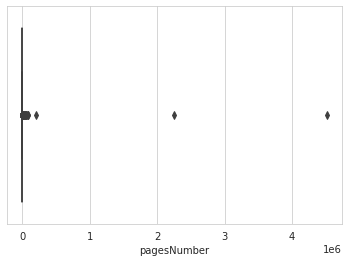

In [52]:
sns.boxplot(books_pd['pagesNumber'])

/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pagesNumber'>

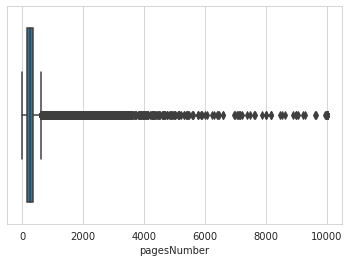

In [53]:
sns.boxplot(books_pd['pagesNumber'][(books_pd['pagesNumber']>0) &(books_pd['pagesNumber']<10000)])

## Pie chart for language use

eng    206398
fre     15687
ger     10967
spa      6941
jpn      1895
ita      1129
mul       391
por       388
nl        349
pol       311
Name: Language, dtype: int64


<AxesSubplot:ylabel='Language'>

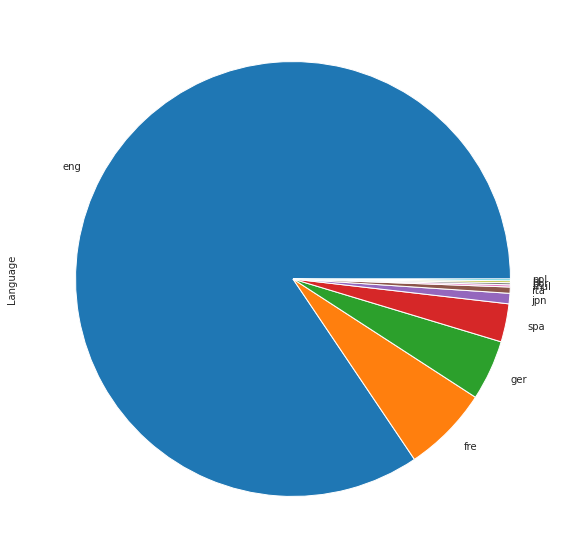

In [54]:
pie_data = books_pd['Language'].value_counts().head(10)
print(pie_data)
fig = plt.figure(figsize=(10,10))
pie_data.plot.pie()

## Analyze the pairwise relationship of the avg ratings and each rating

<AxesSubplot:xlabel='Rating', ylabel='RatingDist1'>

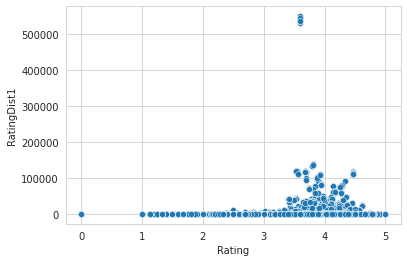

In [55]:
rating_data = books_pd[['Rating','RatingDist1','RatingDist2','RatingDist3','RatingDist4','RatingDist5', 'RatingDistTotal']]
sns.scatterplot(data=rating_data, x='Rating', y='RatingDist1')

<AxesSubplot:xlabel='Rating', ylabel='RatingDist2'>

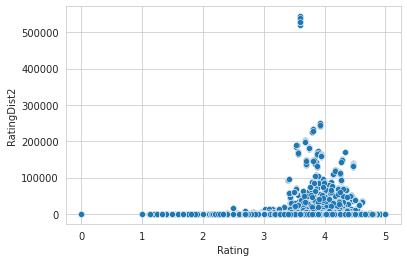

In [56]:
sns.scatterplot(data=rating_data, x='Rating', y='RatingDist2')

<AxesSubplot:xlabel='Rating', ylabel='RatingDist4'>

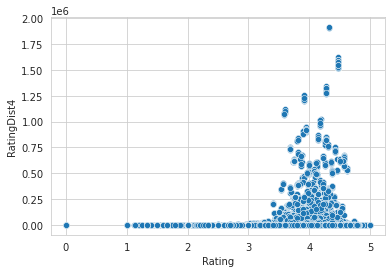

In [57]:
sns.scatterplot(data=rating_data, x='Rating', y='RatingDist4')

<AxesSubplot:xlabel='Rating', ylabel='RatingDist4'>

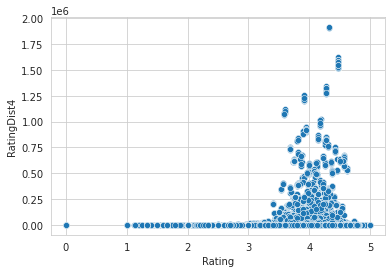

In [58]:
sns.scatterplot(data=rating_data, x='Rating', y='RatingDist4')

## Process the user rating file

<AxesSubplot:xlabel='Rating', ylabel='RatingDist5'>

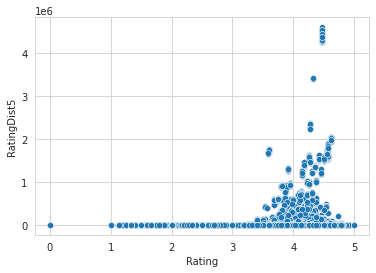

In [59]:
sns.scatterplot(data=rating_data, x='Rating', y='RatingDist5')

In [60]:
users_pd['ID'].value_counts()

4196     3637
4806     3236
4693     2736
1134     2089
284      2052
         ... 
10484       1
10483       1
10482       1
10480       1
3155        1
Name: ID, Length: 8919, dtype: int64

In [61]:
users_pd['Name'].nunique()

103533

In [62]:
users_pd['Rating'].value_counts()

really liked it                      132808
liked it                              96047
it was amazing                        92354
it was ok                             28811
did not like it                        7811
This user doesn't have any rating      4765
Name: Rating, dtype: int64

### Drop the users who do not make any ratings

In [63]:
no_rating_df = users_pd[users_pd['Rating']=='This user doesn\'t have any rating']

In [64]:
no_rating_df['Name'].value_counts()

Rating    4765
Name: Name, dtype: int64

In [65]:
users_pd_dropna = users_pd.drop(no_rating_df.index.tolist())
users_pd_dropna['Rating'].value_counts()

really liked it    127291
liked it            92022
it was amazing      88159
it was ok           27616
did not like it      7503
Name: Rating, dtype: int64

## Replace the string rating with integer

In [66]:
users_pd_dropna.replace('it was amazing', 5, inplace=True)
users_pd_dropna.replace('really liked it', 4, inplace=True)
users_pd_dropna.replace('liked it', 3, inplace=True)
users_pd_dropna.replace('it was ok', 2, inplace=True)
users_pd_dropna.replace('did not like it', 1, inplace=True)

/home/jin/miniconda3/envs/mle_capstone/lib/python3.8/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [67]:
users_pd_dropna['Rating'].value_counts()

4    127291
3     92022
5     88159
2     27616
1      7503
Name: Rating, dtype: int64